In [31]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

In [32]:
# загрузим данные
df = pd.read_csv('data/values_from_the_instrument.zip')
# датасет содержит имя покемона, силу его защиты, атаки и скорость
df.head()

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278


## k-means кластеризация

<AxesSubplot:xlabel='x1', ylabel='x2'>

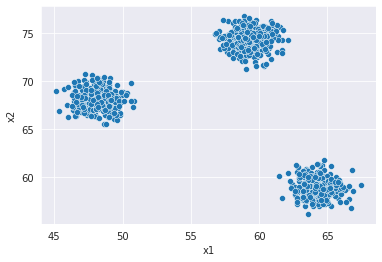

In [33]:
# попробуем кластеризовать покемонов по их силе атаки и защиты
# для этого сохраним в матрицу X 2 интересующих признака: атаку и защиту
X = df[['x1', 'x2']]

#визуализируем
sns.scatterplot(data=X, x='x1', y='x2')

Теперь инициализируем алгоритм k-means. Для этого зададим:  
    - n_clusters - количество кластеров  
    - init - стратегию кластеризации  
    - n_init - количество запусков алгоритма k-means  
    - random_state - для того, чтобы результаты от запуска к запуску воспроизводились  

<AxesSubplot:xlabel='x1', ylabel='x2'>

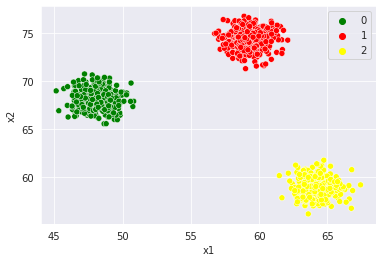

In [44]:
# инициализируем алгоритм k-means, с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

#визуализируем результаты, параметр c принимает вектор с номерами классов, для группировки объектов по цветам 
sns.scatterplot(data=X, x='x1', y='x2', hue=predictions, palette=['green','red','yellow'])

## Выбор количества кластеров с помощью метода локтя

<AxesSubplot:xlabel='cluster', ylabel='inertia'>

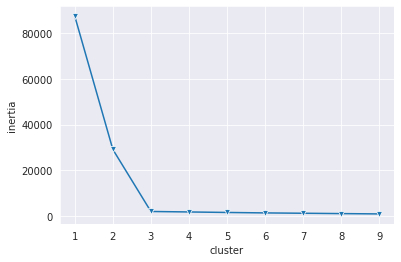

In [45]:
# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов,и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создадим пустой словарь, ключами будут инерция и количество кластеров
res = {"inertia": [], "cluster": []}

# выберем нужные данные 
X = df[['x1', 'x2']]

# итерируемся по разным размерам кластеров (от 1 до 9) и сохраним значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    res["inertia"].append(get_inertia(cluster_num, X))
    res["cluster"].append(cluster_num)

# сохраним в датафрейм значение инерции и количество кластеров
res_df = pd.DataFrame(res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=res_df, x="cluster", y="inertia", marker= "v")

## Выбор количества кластеров с помощью коэффициент силуэта

<AxesSubplot:xlabel='cluster', ylabel='silhouette'>

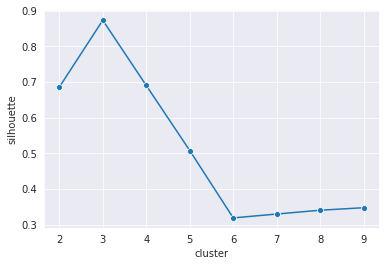

In [46]:
# импортируем метрику силуэт
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = df[['x1', 'x2']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

## GMM кластеризация

In [47]:
# загрузим новые данные
df_house = pd.read_csv('data/housing.zip')
# датасет содержит имя покемона, силу его защиты, атаки и скорость
df_house.head()

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


<AxesSubplot:xlabel='year', ylabel='price'>

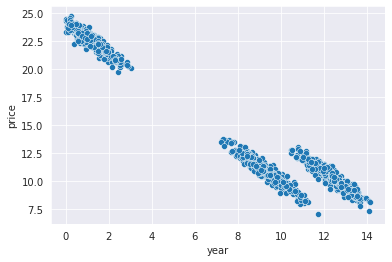

In [48]:
# попробуем кластеризацию GMM
# для этого сохраним в матрицу X два признака: цену и возраст квартир
X = df_house

#визуализируем
sns.scatterplot(data=X, x='year', y='price')

Видно что 3 разных кластера создают данные

### Используем алгоритм GMM

In [49]:
# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture


gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

<AxesSubplot:xlabel='year', ylabel='price'>

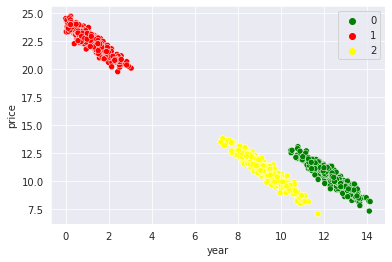

In [50]:
sns.set_style()
sns.scatterplot(data=X, x='year', y='price', hue=gm_prediction, palette=['green','red','yellow'])

Алгоритм GMM справился с кластеризацией данных

### Используем алгоритм K-means

<AxesSubplot:xlabel='year', ylabel='price'>

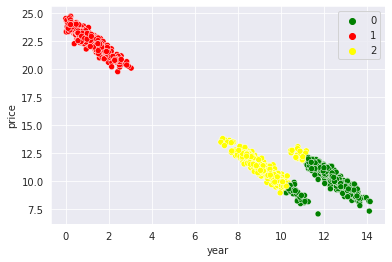

In [51]:
# инициализируем алгоритм k-means, с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

#визуализируем результаты, параметр c принимает вектор с номерами классов, для группировки объектов по цветам 
sns.scatterplot(data=X, x='year', y='price', hue=predictions, palette=['green','red','yellow'])

Алгоритм K-means не справился с кластеризацией данных

## Спектральная кластеризация

In [10]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering


# запускаем кластеризацию 
spectral_clustering = SpectralClustering(n_clusters=3, n_init=1500, random_state=42)

spectral_clustering.fit(X)
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

<AxesSubplot:xlabel='year', ylabel='price'>

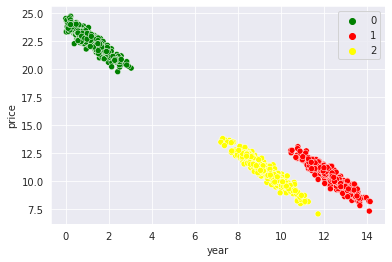

In [52]:
sns.scatterplot( data=X, x='year', y='price', hue=spectral_predictions, palette=['green','red','yellow'])

## DBSCAN

<AxesSubplot:xlabel='year', ylabel='price'>

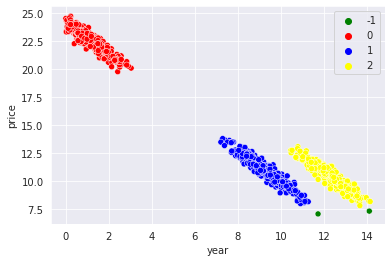

In [63]:
# импортируем DBSCAN кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN().fit(X)

# Далее можно визуализировать результаты, как мы делали с алгоритмом k-means
sns.scatterplot(data=X, x='year', y='price', hue=clustering.labels_, palette=['green','red','blue', 'yellow'])

<AxesSubplot:xlabel='year', ylabel='price'>

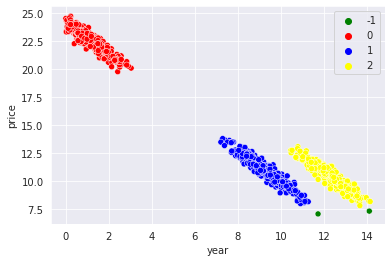

In [64]:
#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps = 0.5, min_samples = 5).fit(X)

# Далее можно визуализировать результаты, как мы делали с алгоритмом k-means
sns.scatterplot(data=X, x='year', y='price', hue=clustering.labels_, palette=['green','red','blue', 'yellow'])

<AxesSubplot:xlabel='year', ylabel='price'>

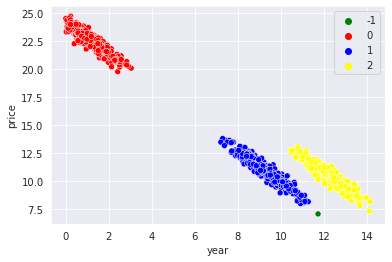

In [67]:
#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps = 0.7, min_samples = 6).fit(X)

# Далее можно визуализировать результаты, как мы делали с алгоритмом k-means
sns.scatterplot(data=X, x='year', y='price', hue=clustering.labels_, palette=['green','red','blue', 'yellow'])

<AxesSubplot:xlabel='year', ylabel='price'>

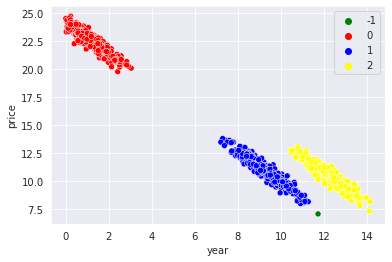

In [68]:
#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps = 0.7, min_samples = 5).fit(X)

# Далее можно визуализировать результаты, как мы делали с алгоритмом k-means
sns.scatterplot(data=X, x='year', y='price', hue=clustering.labels_, palette=['green','red','blue', 'yellow'])

<AxesSubplot:xlabel='year', ylabel='price'>

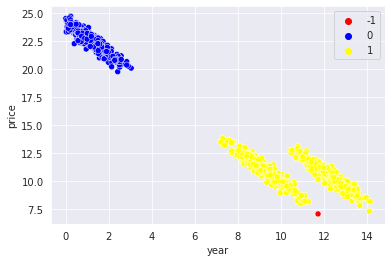

In [71]:
#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps = 1.15, min_samples = 2).fit(X)

# Далее можно визуализировать результаты, как мы делали с алгоритмом k-means
sns.scatterplot(data=X, x='year', y='price', hue=clustering.labels_, palette=['red','blue', 'yellow'])